# Support Vector Regression

## ======== Import the data set ========

In [1]:
import pandas as pd
dataset = pd.read_csv('Position_Salaries.csv')
x = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, -1].values

## ======== Feature Scaling (not treated in SVR) ===========

In [2]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)
y = sc.fit_transform(y.reshape((-1, 1))).reshape((len(y),))

/Users/LianshuiZhao/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/LianshuiZhao/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/LianshuiZhao/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/LianshuiZhao/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


## ====== Fit the linear-kernel SVR model to the data set =======

In [3]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'linear')
regressor.fit(x, y)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='linear', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

### ====== Visualize the linear-kernel SVR =========

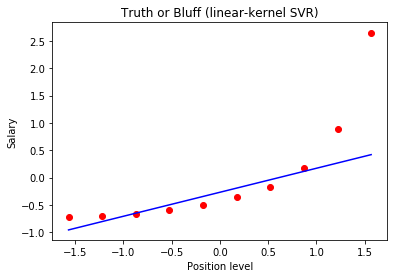

In [4]:
import matplotlib.pyplot as plt
plt.scatter(x, y, color = 'red')
plt.plot(x, regressor.predict(x), color = 'blue')
plt.title('Truth or Bluff (linear-kernel SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show() #just like simple linear regression fit. So try other options

## ====== Fit the poly-kernel SVR model to the data set =======

In [5]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'poly')
regressor.fit(x, y)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='poly', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

### ====== Visualize the poly-kernel SVR =========

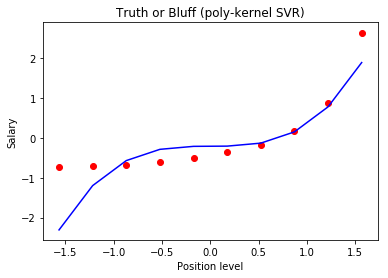

In [6]:
import matplotlib.pyplot as plt
plt.scatter(x, y, color = 'red')
plt.plot(x, regressor.predict(x), color = 'blue')
plt.title('Truth or Bluff (poly-kernel SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show() #does not look right in the left connor.

## ====== Fit the rbf-kernel SVR model to the data set =======

In [7]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(x, y)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

### ====== Visualize the rbf-kernel SVR =========

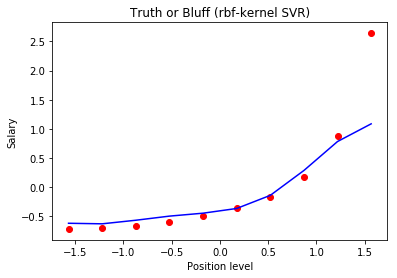

In [8]:
import matplotlib.pyplot as plt
plt.scatter(x, y, color = 'red')
plt.plot(x, regressor.predict(x), color = 'blue')
plt.title('Truth or Bluff (rbf-kernel SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show() #looks right, but except for the right-most point, which might be treated as a noise

## ====== Fit the sigmoid-kernel SVR model to the data set =======

In [9]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'sigmoid')
regressor.fit(x, y)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='sigmoid', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

### ====== Visualize the sigmoid-kernel SVR =========

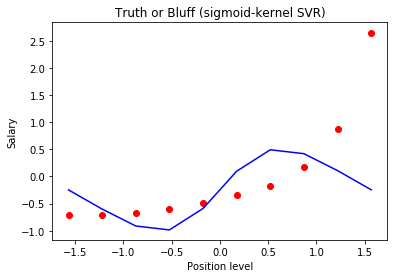

In [10]:
import matplotlib.pyplot as plt
plt.scatter(x, y, color = 'red')
plt.plot(x, regressor.predict(x), color = 'blue')
plt.title('Truth or Bluff (sigmoid-kernel SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show() #no, the trend is not good.

## ======== Grid search for poly/rbf-kernel SVR ========

In [11]:
x_train = x
y_train = y
from sklearn.model_selection import GridSearchCV
parameters = [{'kernel': ['poly'], 'degree': [2, 3, 4, 5, 6], 'C': [0.5, 1., 2, 3, 4]},
              {'kernel': ['rbf'], 'gamma': ['auto', 'scale'], 'C': [0.5, 1., 2]}]
grid_search = GridSearchCV(estimator = SVR(),
                           param_grid = parameters,
                           scoring = 'neg_mean_squared_error',
                           cv = 10,
                           n_jobs = -1)
grid_search = grid_search.fit(x_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print('The best neg_mean_squared_error:', best_accuracy)
print('The best parameters:', best_parameters)

The best neg_mean_squared_error: -0.3351407131967279
The best parameters: {'kernel': 'rbf', 'gamma': 'scale', 'C': 2}


## ====== Visualize the 'best' SVR =========

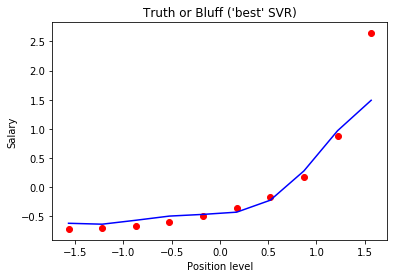

In [12]:
regressor = SVR(kernel = 'rbf', C = 2, gamma = 'scale')
regressor.fit(x, y)
import matplotlib.pyplot as plt
plt.scatter(x, y, color = 'red')
plt.plot(x, regressor.predict(x), color = 'blue')
plt.title('Truth or Bluff (\'best\' SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()